In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Reshape, Activation, Flatten
from keras.layers import Input, BatchNormalization, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD

from utils import LossHistory, plotHistory, visualization_data
from datasets.fashion_mnist import dataGenerator
from keras_lropt.callbacks import LRFinderAuto as LRFinder

Using TensorFlow backend.


# Parameters

In [2]:
num_class = 10
input_shape = (28, 28, 1)

batch_size = 32

data_augmentation = {
    'width_shift_range': 2,
    'height_shift_range': 2
}

# Dataset

In [3]:
trainGenerator = dataGenerator('train', batch_size=batch_size, reshape=False, **data_augmentation)
testGenerator = dataGenerator('test', batch_size=batch_size, reshape=False)

# Model

In [4]:
model = Sequential([
    Convolution2D(filters=256, kernel_size=(7, 7), padding='same', input_shape=input_shape),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    
    Convolution2D(filters=512, kernel_size=(3, 3), padding='same'),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    
    Flatten(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 256)       12800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 512)         2048      
__________

# Training

In [6]:
model.compile(optimizer=Adam(lr=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

In [7]:
history = LossHistory(metrics=('loss', 'acc'))

In [8]:
hist = model.fit_generator(trainGenerator,
                                    steps_per_epoch=60000 // batch_size,
                                    epochs=10,
                                    validation_data=testGenerator,
                                    validation_steps=10000 // batch_size,
                                    verbose=2,
                                    callbacks=[history])

Epoch 1/10
 - 47s - loss: 0.4582 - acc: 0.8405 - val_loss: 0.3978 - val_acc: 0.8676
Epoch 2/10
 - 46s - loss: 0.3395 - acc: 0.8819 - val_loss: 0.3302 - val_acc: 0.8804
Epoch 3/10
 - 45s - loss: 0.3063 - acc: 0.8919 - val_loss: 0.3100 - val_acc: 0.8906
Epoch 4/10
 - 46s - loss: 0.2799 - acc: 0.9003 - val_loss: 0.2987 - val_acc: 0.9008
Epoch 5/10
 - 46s - loss: 0.2620 - acc: 0.9062 - val_loss: 0.3032 - val_acc: 0.9008
Epoch 6/10
 - 46s - loss: 0.2464 - acc: 0.9128 - val_loss: 0.2954 - val_acc: 0.9028
Epoch 7/10
 - 45s - loss: 0.2327 - acc: 0.9171 - val_loss: 0.2659 - val_acc: 0.9098
Epoch 8/10
 - 45s - loss: 0.2221 - acc: 0.9205 - val_loss: 0.2509 - val_acc: 0.9136
Epoch 9/10
 - 45s - loss: 0.2165 - acc: 0.9221 - val_loss: 0.2545 - val_acc: 0.9167
Epoch 10/10
 - 46s - loss: 0.2036 - acc: 0.9270 - val_loss: 0.2544 - val_acc: 0.9134


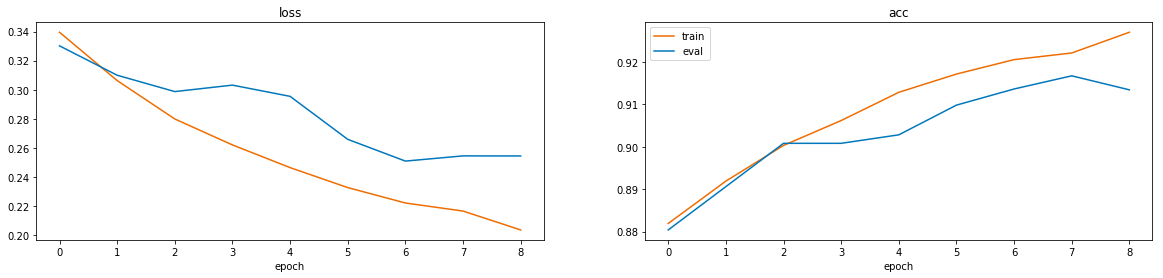

In [9]:
plotHistory(history.metrics)

# Evaluation on augmented data

## Accuracy

In [10]:
data_augmentation = {
    'rotation_range': 30
}

# Select data
testGenerator = dataGenerator('test', batch_size=batch_size, reshape=False, **data_augmentation)

In [11]:
test_acc = model.evaluate_generator(testGenerator, steps=10000/32)[1]
print(f'Test acc: {round(test_acc, 3)} (augmented data)')

Test acc: 0.631 (augmented data)


## Visualization

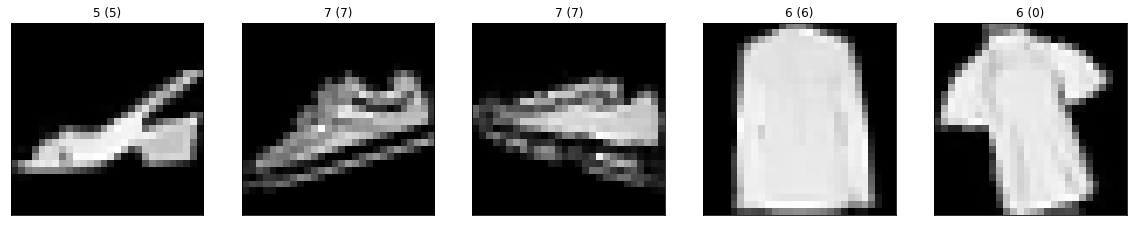

In [12]:
n_image=5

# Select data
testGenerator = dataGenerator('test', batch_size=n_image, reshape=False, **data_augmentation)
images, labels = next(testGenerator)

# Run inference
predictions = model.predict(images)

# Post-process data
labels = np.argmax(labels, axis=1)
predictions = np.argmax(predictions, axis=1)
images = images.reshape((-1, 28, 28))

visualization_data(images, labels, predictions)